# Credit Card Fraud Detection using CNN

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.0.0


In [2]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Loading the data

You can download dataset from Kaggle - [creditcard.csv]( https://www.kaggle.com/mlg-ulb/creditcardfraud)

In [3]:
data = pd.read_csv('data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [6]:
data.isnull().sum() #checking null value

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Balance Dataset

In [8]:
#going to balance the dataset in order to get better prediction
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]

In [9]:
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [10]:
#selecting fraud samples from non_fraud samples in random
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

Now fraud and non_fraud samples are balanced, Now we want to merge these two datasets together.

In [11]:
data = fraud.append(non_fraud, ignore_index=True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,63748.0,1.244017,0.169173,0.562834,0.826603,-0.461723,-0.690563,0.036161,-0.189180,0.318794,...,-0.224508,-0.403441,0.006843,0.456222,0.488841,0.266132,-0.014957,0.014030,1.00,0
980,103079.0,2.213395,-0.875744,-2.647330,-1.808588,1.987743,3.139308,-1.048055,0.602834,0.595619,...,0.280869,0.961339,0.036801,0.702292,0.217999,0.050705,-0.046687,-0.078380,15.00,0
981,129476.0,2.061842,-0.307976,-2.786548,-0.777438,2.499925,3.163437,-0.400266,0.715920,0.448457,...,0.241950,0.745453,0.040329,0.737381,0.303977,-0.087560,-0.000615,-0.065441,1.00,0
982,53637.0,0.943469,-0.208225,0.356809,0.666019,-0.581452,-0.782429,0.223679,-0.143487,-0.310769,...,-0.056486,-0.500566,-0.022650,0.551783,0.202183,0.117106,-0.063452,0.031932,140.00,0


In [13]:
data['Class'].value_counts() #balenced dataset

1    492
0    492
Name: Class, dtype: int64

## Training the data

In [14]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
X_train.shape, X_test.shape

((787, 30), (197, 30))

In [17]:
#standardizing the data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
#converting to NumPy arrays
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [19]:
X_train.shape

(787, 30)

In [22]:
#reshaping to 3 dimensional
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

## Building CNN

In [26]:
epochs = 50
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1792)             

In [28]:
#compiling the model
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [29]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Train on 787 samples, validate on 197 samples
Epoch 1/50
787/787 [==============================] - 5s 7ms/sample - loss: 0.7066 - accuracy: 0.7154 - val_loss: 0.6124 - val_accuracy: 0.8274
Epoch 2/50
787/787 [==============================] - 0s 565us/sample - loss: 0.5095 - accuracy: 0.7980 - val_loss: 0.5664 - val_accuracy: 0.8629
Epoch 3/50
787/787 [==============================] - 0s 442us/sample - loss: 0.3632 - accuracy: 0.8691 - val_loss: 0.5360 - val_accuracy: 0.8934
Epoch 4/50
787/787 [==============================] - 0s 384us/sample - loss: 0.3407 - accuracy: 0.8717 - val_loss: 0.5060 - val_accuracy: 0.9036
Epoch 5/50
787/787 [==============================] - 0s 411us/sample - loss: 0.3420 - accuracy: 0.8831 - val_loss: 0.4757 - val_accuracy: 0.9086
Epoch 6/50
787/787 [==============================] - 0s 416us/sample - loss: 0.3413 - accuracy: 0.8793 - val_loss: 0.4398 - val_accuracy: 0.9036
Epoch 7/50
787/787 [==============================] - 0s 408us/sample - loss: 0.

Here validation Accurcy is lower than the training accuracy, that means model is overfitting

In [32]:
#plotting the learning curve
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()


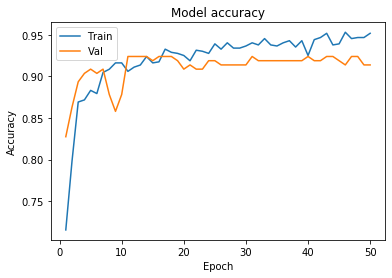

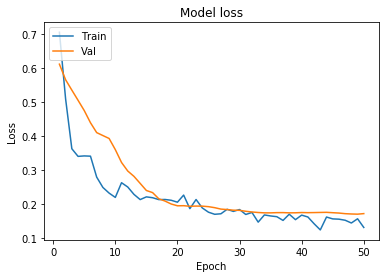

In [33]:
plot_learningCurve(history, epochs)

## Adding MaxPool

Train on 787 samples, validate on 197 samples
Epoch 1/50
787/787 [==============================] - 1s 2ms/sample - loss: 1.2886 - accuracy: 0.5006 - val_loss: 0.6796 - val_accuracy: 0.5178
Epoch 2/50
787/787 [==============================] - 0s 234us/sample - loss: 1.0629 - accuracy: 0.5832 - val_loss: 0.6512 - val_accuracy: 0.7107
Epoch 3/50
787/787 [==============================] - 0s 237us/sample - loss: 0.7980 - accuracy: 0.6633 - val_loss: 0.6258 - val_accuracy: 0.7310
Epoch 4/50
787/787 [==============================] - 0s 228us/sample - loss: 0.6639 - accuracy: 0.7179 - val_loss: 0.5979 - val_accuracy: 0.7259
Epoch 5/50
787/787 [==============================] - 0s 254us/sample - loss: 0.5778 - accuracy: 0.7586 - val_loss: 0.5665 - val_accuracy: 0.7360
Epoch 6/50
787/787 [==============================] - 0s 228us/sample - loss: 0.6257 - accuracy: 0.7560 - val_loss: 0.5331 - val_accuracy: 0.7665
Epoch 7/50
787/787 [==============================] - 0s 212us/sample - loss: 0.

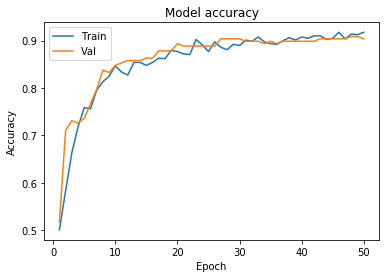

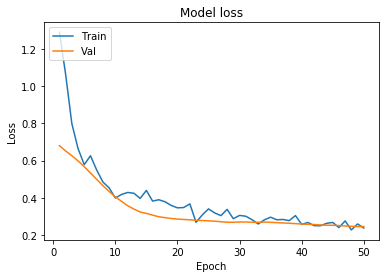

In [34]:
epochs = 50
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)
plot_learningCurve(history, epochs)

### References:

- [YouTube]( http://cmgreen.io/2016/01/04/tensorflow_deep_autoencoder.html)
- [GitHub]( https://github.com/laxmimerit/Credit-Card-Fraud-Detection-using-CNN-in-TensorFlow-2.0/blob/master/Credit%20Card%20Transaction%20Fraud%20Detection%20using%20CNN.ipynb)

